<a href="https://colab.research.google.com/github/niveditha04-yellanuru/AI-Internship-Project/blob/main/Movie_recommendation_using_and_unsupervisor_learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ==============================================
# 🎬 MOVIE RECOMMENDATION SYSTEM (UNSUPERVISED)
# Using K-Means Clustering
# ==============================================

# Step 1: Install and Import Required Libraries
!pip install openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



In [ ]:
# Step 2: Upload Dataset
# -----------------------
# Click the folder icon on the left sidebar in Colab
# and upload your dataset.xlsx file there.
# OR use the code below to upload directly from your system.
from google.colab import files
uploaded = files.upload()



Saving dataset2.xlsx to dataset2 (2).xlsx


In [ ]:
# Step 3: Load the Excel File
data = pd.read_excel("dataset.xlsx")

# Display top 5 rows
print("✅ Dataset Loaded Successfully!")
data.head()


✅ Dataset Loaded Successfully!


,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811


In [ ]:
# Show column names and info
print("\nDataset Info:")
data.info()

# Drop missing values (if any)
data.dropna(inplace=True)

# Display first few rows
data.head()



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 10000 non-null  int64         
 1   title              10000 non-null  object        
 2   genre              9997 non-null   object        
 3   original_language  10000 non-null  object        
 4   overview           9987 non-null   object        
 5   popularity         10000 non-null  float64       
 6   release_date       10000 non-null  datetime64[ns]
 7   vote_average       10000 non-null  float64       
 8   vote_count         10000 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 703.3+ KB


,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811


In [ ]:
# Select numeric columns for clustering
# You can modify this depending on your dataset columns
numeric_features = data.select_dtypes(include=[np.number])

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

print("✅ Data scaling completed!")


✅ Data scaling completed!


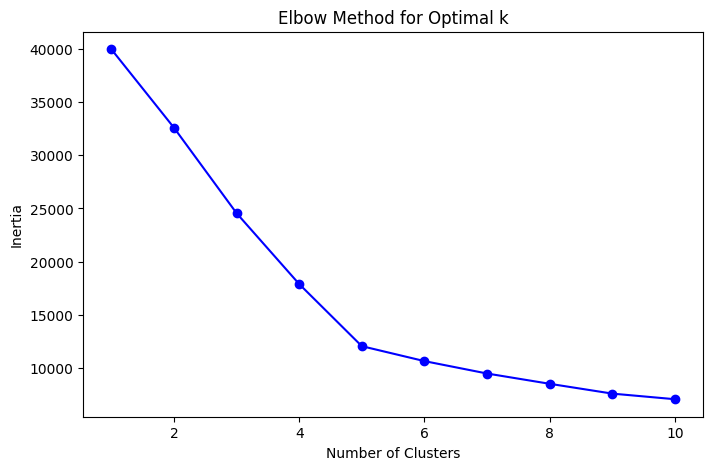

In [ ]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [ ]:
# Set the number of clusters (change k based on elbow result)
k = 4

kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

print("✅ Clustering completed!")
data.head()


✅ Clustering completed!


,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count,Cluster
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862,3
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731,3
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280,3
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959,3
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811,3


In [ ]:
def recommend_movie(movie_name):
    if 'Movie' not in data.columns:
        print("⚠️ Please ensure your dataset has a 'Movie' column!")
        return

    if movie_name not in data['Movie'].values:
        print("❌ Movie not found in dataset!")
        return

    cluster = data[data['Movie'] == movie_name]['Cluster'].values[0]
    similar_movies = data[data['Cluster'] == cluster]['Movie']

    print(f"\n🎬 Movies similar to '{movie_name}':\n")
    for m in similar_movies.sample(min(5, len(similar_movies))):
        print("👉", m)


In [ ]:
data.rename(columns={'title': 'Movie', 'movie_name': 'Movie'}, inplace=True)


In [ ]:
print(data.columns)


Index(['id', 'Movie', 'genre', 'original_language', 'overview', 'popularity',
       'release_date', 'vote_average', 'vote_count'],
      dtype='object')


In [ ]:
data['Cluster'] = kmeans.fit_predict(scaled_features)


In [ ]:
recommend_movie('The Shawshank Redemption')


🎬 Movies similar to 'The Shawshank Redemption':

👉 The War of the Roses
👉 Cool Kids Don't Cry
👉 Gangs of Wasseypur - Part 1
👉 The Cure
👉 Thor: Ragnarok
